# Scikit-learn 연습 02

비만도(bmi) 데이터 학습

- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # 평가를 위한 모듈

In [36]:
data = pd.read_csv('./data/bmi_500.csv', index_col='Label')

In [37]:
# 데이터를 불러오면 가장 먼저 할꺼
# data
# data.info()
# data.describe()
data.head()
# data.tail()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


- describe()

    - mean 과 50% 의 값이 비슷하다

    - 좋은 데이터이다.(정규분포를 따른다)

In [42]:
# data['Label'].unique()
# data.Label.value_counts()

In [55]:
def easy_scatter(label, color):
    t = data.loc[label]
    plt.scatter(t['Weight'], t['Height'], c=color, label=label)

    return

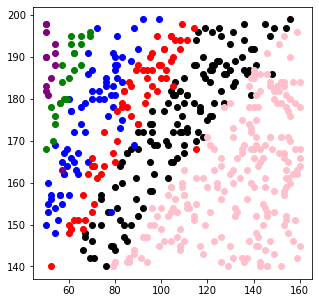

In [60]:
# 데이터 시각화
plt.figure(figsize=(5, 5))
# 방법 1
# t = data.loc['Extremely Weak']
# plt.scatter(t['Weight'], t['Height'], c='black')

# 방법 2 함수 구현
# easy_scatter('Extremely Weak', 'black')

# 방법 3 함수와 for 사용
data_lst = data.index.unique()
color_lst = ['black', 'blue', 'red', 'pink', 'green', 'purple']

for idx, val in enumerate(data_lst):
    easy_scatter(val, color_lst[idx])
 
plt.show()

모델링

1. 문제와 답으로 분리

2. 훈련셋과 평가셋으로 분리

3. 모델생성 및 하이퍼파라미터 조정

4. 학습 및 평가

## 비만도 모델 학습

In [91]:
data = pd.read_csv('./data/bmi_500.csv')

In [92]:
X = data[['Height', 'Weight']]
y = data['Label']

X.shape, y.shape

((500, 2), (500,))

In [83]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 150, random_state=0)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((350, 2), (150, 2), (350,), (150,))

In [97]:
X.shape, y.shape

((500, 2), (500,))

In [102]:
# 위의 train_test_split 사용 하지 않고 하는 방법
X_train = X.iloc[:350, :]
X_test = X.iloc[350:, :]

y_train = y.iloc[:350]
y_test = y.iloc[350:]

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
pre = model.predict(X_test)
metrics.accuracy_score(pre, y_test)

0.9133333333333333

In [103]:
# 예측 활용
model.predict([[100, 20], [185, 43]])

array(['Normal', 'Extremely Weak'], dtype=object)

## 머신러닝(Machine Learning) 진행 과정

1. ProblemIdentification (문제정의)

2. Data Collect(데이터 수집)

3. Data Preprocessing(데이터 전처리)

4. EDA(탐색적 데이터분석)

5. Model 선택, Hyper Parameter 조정

6. 학습

7. 모델 Evaluation(평가)